In [1]:
import datetime
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import glob

In [2]:
names = glob.glob("../data/2016/08/*.h5")
name = names[0]
name.split("_")[5]
last_number = name.split("_")[5]
date_time = datetime.datetime.strptime(last_number, "%Y%m%d%H%M%S")

In [3]:
import datetime
import glob

names = glob.glob("../data/2016/08/*.h5")

date_times = []
dates_txt = []
for name in names:
    last_number = name.split("_")[5]
    date_time = datetime.datetime.strptime(last_number, "%Y%m%d%H%M%S")
    date_times.append(date_time)
    dates_txt.append(last_number)

# Sort the lists based on date_times
sorted_names, date_times, dates_txt = zip(
    *sorted(zip(names, date_times, dates_txt), key=lambda x: x[1])
)

In [4]:
# Some codes for testing individual tiles and get the variables names

tiles = ["31"]
i = 11
da = rioxarray.open_rasterio(
    sorted_names[i] + "/outputs/tile" + tiles[0] + "_" + dates_txt[i] + ".tif"
)
var_names = da.attrs["long_name"]
print(var_names)
# da.isel(band=0).where(da.isel(band=0) > 0).mean()

('LAI', 'SLAI', 'FPAR', 'NDVI', 'SZA', 'VZA', 'SAA', 'VAA', 'DASF', 'ERTI', 'W443', 'W551', 'W680', 'W780')


In [75]:
import pandas as pd
import xarray as xr

tiles = ["31"]
lai_list = []
slai_list = []
fpar_list = []
ndvi_list = []
dasf_list = []
erti_list = []
sza_list = []
date_time_list = []
no_data = []
yes_data = []
for i in range(len(sorted_names)):
    try:
        da = rioxarray.open_rasterio(
            sorted_names[i] + "/outputs/tile" + tiles[0] + "_" + dates_txt[i] + ".tif"
        )
        lai = da.isel(band=0)
        lai = lai.where(lai > 0)
        lai_list.append(lai)
        slai = da.isel(band=1)
        slai = slai.where(slai > 0)
        slai_list.append(slai)
        fpar = da.isel(band=2)
        fpar = fpar.where(fpar > 0)
        fpar_list.append(fpar)
        ndvi = da.isel(band=3)
        ndvi = ndvi.where(ndvi > 0)
        ndvi_list.append(ndvi)
        dasf = da.isel(band=8)
        dasf = dasf.where(dasf > 0)
        dasf_list.append(dasf)
        erti = da.isel(band=9)
        erti = erti.where(erti > 0)
        erti_list.append(erti)
        sza = da.isel(band=4)
        sza = sza.where(sza > 0)
        sza_list.append(sza)
        date_time_list.append(date_times[i])
        yes_data.append(sorted_names[i])
    except:
        no_data.append(sorted_names[i])
        continue

# Concatenate along a new dimension (e.g., 'time')
lai_combined = (
    xr.concat(lai_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
slai_combined = (
    xr.concat(slai_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
fpar_combined = (
    xr.concat(fpar_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
ndvi_combined = (
    xr.concat(ndvi_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
dasf_combined = (
    xr.concat(dasf_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
erti_combined = (
    xr.concat(erti_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
sza_combined = (
    xr.concat(sza_list, dim="time")
    .assign_coords(time=date_time_list)
    .drop_vars("band")
    .rio.write_crs("epsg:4326")
)
ds = xr.Dataset(
    {
        "lai": lai_combined,
        "slai": slai_combined,
        "fpar": fpar_combined,
        "ndvi": ndvi_combined,
        "dasf": dasf_combined,
        "erti": erti_combined,
    }
)

In [97]:
filtered_lai_combined = lai_combined.where(sza_combined < 55)
filtered_lai_combined = filtered_lai_combined.rio.write_crs("epsg:4326")
filtered_lai_combined = filtered_lai_combined.rio.reproject("epsg:4326")


In [99]:
lai_combined.to_netcdf("../outputs/lai_combined.nc")
# filtered_lai_combined.to_netcdf("../outputs/filtered_lai_combined_rep.nc")

In [95]:
filtered_lai_combined.sel(x=-5.45, y=-33.53, method="nearest")


<xarray.DataArray (time: 354)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])
Coordinates:
    x            float64 -25.05
    y            float64 -33.55
  * time         (time) datetime64[ns] 2016-08-01T12:17:55 ... 2016-08-31T12:...
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        3.1771855905305
    STATISTICS_MEAN:           0.033405825013258
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         0.18354178373516
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 ('LAI', 'SLAI', 'FPAR', 'NDVI', 'SZA', 'VZA', ...
    _FillValue:                -9999.0

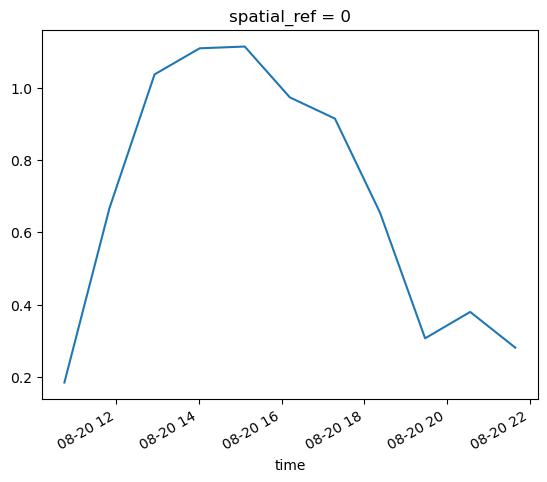

In [84]:
t1 = "2016-08-20"
filtered_lai_combined_mean = filtered_lai_combined.sel(time=t1).mean(["x", "y"])
filtered_lai_combined_mean.plot()

In [6]:
lai_combined.to_netcdf("../outputs/lai_combined.nc")
slai_combined.to_netcdf("../outputs/slai_combined.nc")
fpar_combined.to_netcdf("../outputs/fpar_combined.nc")
ndvi_combined.to_netcdf("../outputs/ndvi_combined.nc")
erti_combined.to_netcdf("../outputs/erti_combined.nc")
dasf_combined.to_netcdf("../outputs/dasf_combined.nc")
ds.to_netcdf("../outputs/2016_tile31_dataset.nc")

In [ ]:
import numpy as np
import xarray as xr

lai_combined = xr.open_dataset("../outputs/lai_combined.nc")[
    "__xarray_dataarray_variable__"
]

# Create a new coordinate that represents the week of the year
lai_combined["week_of_year"] = lai_combined["time"].dt.isocalendar().week

# Create a new coordinate that represents the hour of the day
lai_combined["hour_of_day"] = lai_combined["time"].dt.hour

# Set 'week_of_year' and 'hour_of_day' as a multi-index
lai_combined = lai_combined.set_index(time=["week_of_year", "hour_of_day"])

# Sort the 'time' dimension
lai_combined = lai_combined.sortby("time")

# Group by the 'time' dimension and then take the mean over the 'time' dimension
weekly_hourly_data = lai_combined.groupby("time").mean()

# Print the resampled DataArray
weekly_hourly_data

In [ ]:
# Select data for the 31st week
week_31_data = weekly_hourly_data.sel(week_of_year=31)
del week_31_data.attrs["grid_mapping"]
week_31_data.rio.write_crs(4326, inplace=True)
week_31_data = week_31_data.rio.reproject("EPSG:4326")
week_31_data.to_netcdf("../outputs/week_31_data5.nc")

In [ ]:
lai_combined = xr.open_dataset("../outputs/lai_combined.nc")[
    "__xarray_dataarray_variable__"
]

import numpy as np
import xarray as xr

# Create a new coordinate that represents the week of the year
lai_combined["week"] = lai_combined["time"].dt.isocalendar().week

# Create a new coordinate that represents the hour of the day
lai_combined["hour_of_day"] = lai_combined["time"].dt.hour

# Convert 'week' and 'hour_of_day' to string
lai_combined["week_str"] = lai_combined["week"].astype(str)
lai_combined["hour_of_day_str"] = lai_combined["hour_of_day"].astype(str)

# Create a new coordinate that combines the 'week_str' and 'hour_of_day_str' coordinates
lai_combined["week_hour"] = xr.apply_ufunc(
    np.core.defchararray.add, lai_combined["week_str"], lai_combined["hour_of_day_str"]
)

# Group by the 'week_hour' coordinate and then take the mean over the 'time' dimension
weekly_hourly_data = lai_combined.groupby("week_hour").mean("time")

# Print the resampled DataArray
print(weekly_hourly_data)

In [ ]:
weekly_hourly_data

In [ ]:
week_2_data = weekly_hourly_data.sel(week=2)

In [ ]:
import pandas as pd

# Convert 'time_hour' back to datetime format
weekly_hourly_data["time_hour"] = pd.to_datetime(
    weekly_hourly_data["time_hour"].values, format="%Y-%m-%d_%H"
)

# Set 'time_hour' as the new coordinate
weekly_hourly_data = weekly_hourly_data.swap_dims({"time_hour": "time"})

# Plot the data
weekly_hourly_data.mean(dim=["x", "y"]).plot()

In [ ]:
weekly_data.mean(dim=["x", "y"]).plot()

In [ ]:
x_value = -38.139
y_value = -4.96
erti_combined.sel(x=x_value, y=y_value, method="nearest").plot()

In [73]:
t1 = "2016-08-20"
lai_sliced = ds.lai.sel(time=slice(t1, t1))
slai_sliced = ds.slai.sel(time=slice(t1, t1))
dasf_sliced = ds.dasf.sel(time=slice(t1, t1))
fpar_sliced = ds.fpar.sel(time=slice(t1, t1))
ndvi_sliced = ds.ndvi.sel(time=slice(t1, t1))
erti_sliced = ds.erti.sel(time=slice(t1, t1))

lai_data = lai_sliced.mean(dim=["x", "y"])
slai_data = slai_sliced.mean(dim=["x", "y"])
dasf_data = dasf_sliced.mean(dim=["x", "y"])
fpar_data = fpar_sliced.mean(dim=["x", "y"])
ndvi_data = ndvi_sliced.mean(dim=["x", "y"])
erti_data = erti_sliced.mean(dim=["x", "y"])

In [71]:
x_value = -45.99
y_value = -9.69
lai_data = lai_sliced.sel(x=x_value, y=y_value, method="nearest")
slai_data = slai_sliced.sel(x=x_value, y=y_value, method="nearest")
dasf_data = dasf_sliced.sel(x=x_value, y=y_value, method="nearest")
fpar_data = fpar_sliced.sel(x=x_value, y=y_value, method="nearest")
ndvi_data = ndvi_sliced.sel(x=x_value, y=y_value, method="nearest")
erti_data = erti_sliced.sel(x=x_value, y=y_value, method="nearest")

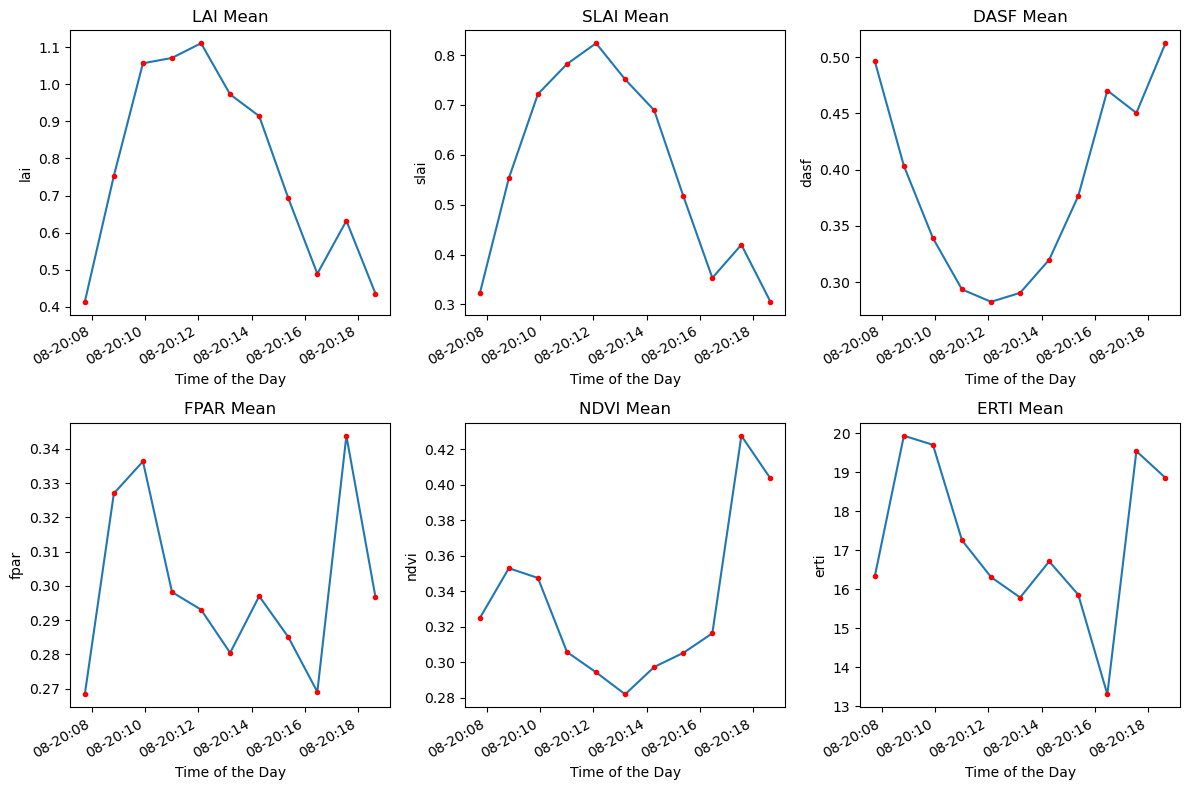

In [74]:
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

# Create a grid of subplots
num_rows = 2  # Adjust the number of rows as needed
num_cols = 3  # Adjust the number of columns as needed

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1] * num_cols)

for i in range(num_rows):
    for j in range(num_cols):
        ax = plt.subplot(gs[i, j])

        if i == 0 and j == 0:
            variable_name = "LAI"
            ds_to_plot = lai_data
            ds_sliced = lai_sliced
        elif i == 0 and j == 1:
            variable_name = "SLAI"
            ds_to_plot = slai_data
            ds_sliced = slai_sliced
        elif i == 0 and j == 2:
            variable_name = "DASF"
            ds_to_plot = dasf_data
            ds_sliced = dasf_sliced
        elif i == 1 and j == 0:
            variable_name = "FPAR"
            ds_to_plot = fpar_data
            ds_sliced = fpar_sliced
        elif i == 1 and j == 1:
            variable_name = "NDVI"
            ds_to_plot = ndvi_data
            ds_sliced = ndvi_sliced
        elif i == 1 and j == 2:
            variable_name = "ERTI"
            ds_to_plot = erti_data
            ds_sliced = erti_sliced

        # Subtract 3 hours from the time axis to change from GMT to local time
        ds_to_plot = ds_to_plot.assign_coords(
            time=ds_to_plot.time - pd.Timedelta(hours=3)
        )

        ds_to_plot.plot(ax=ax)
        ds_to_plot.plot(ax=ax, marker="o", linestyle="", markersize=3, color="red")

        ax.set_title(f"{variable_name} Mean")
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d:%H"))
        ax.set_xlabel("Time of the Day")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
import datetime
import pytz
import timezonefinder


def calculate_time_difference(latitude, longitude):
    """Calculates the time difference between local time at the given coordinates and GMT, considering DST."""

    # Get the timezone at the specified coordinates using timezonefinder
    tf = timezonefinder.TimezoneFinder()
    timezone_at_location = tf.timezone_at(lng=longitude, lat=latitude)
    print(timezone_at_location)
    # Get the current local time in that timezone
    local_time_now = datetime.datetime.now(pytz.timezone(timezone_at_location))

    # Get the current GMT time
    gmt_time_now = datetime.datetime.now(pytz.utc)

    # Calculate the time difference, ensuring accurate handling of DST offsets
    time_difference = local_time_now.astimezone(pytz.utc) - gmt_time_now

    # Convert the time difference to a human-readable format
    time_difference_hours = time_difference.total_seconds() / 3600

    return time_difference_hours


# Example usage (remember to install timezonefinder first):
latitude = y_value  # Replace with your latitude
longitude = x_value  # Replace with your longitude
time_difference = calculate_time_difference(latitude, longitude)
print("Time difference between local time and GMT:", time_difference, "hours")

America/Fortaleza
Time difference between local time and GMT: -3.611111111111111e-09 hours


In [49]:
local_time_index = [
    convert_gmt_to_local(time, y_value, x_value) for time in ds_to_plot.indexes["time"]
]

AttributeError: 'America/New_York' object has no attribute 'upper'